#### PCA applied to postions of face


In [118]:
from modules.loaders import LoadDataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [119]:
dataset = LoadDataset('positions_Faces_v2.h5').load_h5()
type(dataset)

h5py._hl.files.File

In [120]:
with dataset as h5file:
    data_h5 = []
    labels = []
    for face in h5file.keys():
        positions = h5file[face]['positions'][:]
        data_h5.append(positions)
        # print(positions.shape)
        labels.extend([face]*positions.shape[1]) #* extend is used to add the elements of the list, not the list itself  

labels = np.array(labels)
labels_letter = np.reshape(labels, (labels.shape[0], ))
labels_letter.shape


(15395,)

In [121]:
for i, id in enumerate(data_h5):
    print('Data shape',i, id.shape)
n_data = id.shape[1]

Data shape 0 (936, 3079)
Data shape 1 (936, 3079)
Data shape 2 (936, 3079)
Data shape 3 (936, 3079)
Data shape 4 (936, 3079)


In [122]:
labels_letter

array(['enojado', 'enojado', 'enojado', ..., 'triste', 'triste', 'triste'],
      dtype='<U8')

In [123]:
data = np.concatenate(data_h5,axis=1)
data.shape

(936, 15395)

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

normalized_data = scaler.fit_transform(data)

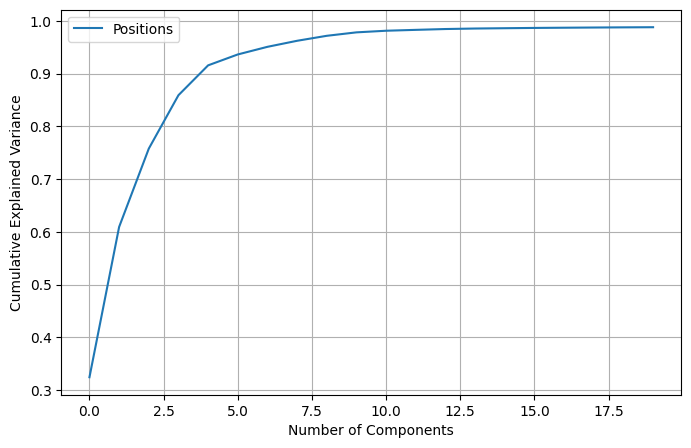

In [125]:
from sklearn.decomposition import PCA

### Reduce dimensions of positions (936)
pca_positions = PCA().fit(normalized_data.T) # Fit PCA to data
# print("Explained variance (positions):", pca_positions.explained_variance_ratio_)

# Plot cumulative explained variance (
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_positions.explained_variance_ratio_[0:20]), label='Positions')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.show()


In [126]:
pca_positions_sum = np.cumsum(pca_positions.explained_variance_ratio_)


In [127]:
np.where((pca_positions_sum > 0.95) & (pca_positions_sum < 1))

### 

(array([  6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
         19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
         32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,
         45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,
         58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
        149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
        162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
        175, 176, 177, 178, 179, 180, 181, 182, 183

###  If the cumulative explained variance is close to 1.0 from the first few principal components (i.e., a small number of components explain almost all the variance), this indicates that your data has high redundancy or that the positions are highly correlated with each other. This is an interesting scenario and has several implications

In [128]:
from sklearn.decomposition import PCA


# Fit PCA and reduce the dimensionality
pca = PCA(n_components=6)
reduced_data = pca.fit_transform(normalized_data.T)

# Recover the original data (or an approximation) using the same PCA object
recovered_data = pca.inverse_transform(reduced_data)

# Print the shape of the reduced and recovered data
print(f"Shape of reduced data: {reduced_data.shape}")
print(f"Shape of recovered data: {recovered_data.shape}")


Shape of reduced data: (15395, 6)
Shape of recovered data: (15395, 936)


In [129]:
valeus = pca.explained_variance_ratio_
valeus

array([0.32418799, 0.2849662 , 0.14847527, 0.10132894, 0.05660171,
       0.02065601])

In [130]:
vectors = pca.components_  # Shape: (3, 936)
#### Let's print the first 3 components
top_features_list = []
n_features = 100 # Number of features to show


for i in range(vectors.shape[0]):  # For each component
    print(f"Componente {i+1}:")
    
    
    top_features = np.argsort(np.abs(vectors[i]))[::-1]  # Sort the features by their absolute value
    #### Minus sign to sort in descending order
    
    # Save the top 10 features
    top_features_list.append(top_features[:n_features].tolist())
    
    for j in top_features[:n_features]:  # Show the top 10 features
        print(f"Feature {j}: {vectors[i, j]}")
    print("\n")

print("Top 10 positions:")
print(top_features_list)

Componente 1:
Feature 468: 0.13267808809868628
Feature 186: 0.1304576924639212
Feature 254: 0.1280341409383538
Feature 264: 0.12509668640256122
Feature 908: 0.11886229607218267
Feature 646: 0.1173791827893031
Feature 712: 0.1134692852143325
Feature 722: 0.11258738218916968
Feature 116: 0.1125045426505213
Feature 324: 0.11213511572302474
Feature 576: 0.10166348388771981
Feature 778: 0.09709763014647063
Feature 68: 0.09391568629738095
Feature 454: 0.09300878467457875
Feature 42: 0.09297663807614437
Feature 8: -0.09148442322076492
Feature 344: 0.09087114990634816
Feature 274: 0.09052889697743427
Feature 2: -0.08989825148663438
Feature 550: -0.08849956133918485
Feature 354: 0.0884596332279027
Feature 548: -0.08740719333484033
Feature 90: -0.08691412114083982
Feature 88: -0.08623028643698703
Feature 430: 0.08214315387409622
Feature 38: -0.08166446024565537
Feature 10: -0.08151516380363905
Feature 794: 0.08104082374343326
Feature 278: 0.08071175692107312
Feature 708: -0.0803271106413245
Feat

In [131]:
import itertools
top_features_list = list(itertools.chain(*top_features_list))  # concatenate lists
print(len(top_features_list))

600


In [132]:
top_features_list.sort()  


In [133]:
top_features_list = list(set(top_features_list))  # Delete duplicates
top_features_array = np.array(top_features_list)
top_features_list =   top_features_list +  [ x+1 if x%2 == 0 else x-1 for x in top_features_array]  # Add the previous and next index  
# if -1 or 936 in top_features_list:
#     try:
#         top_features_list.remove(-1)
#         top_features_list.remove(0)
#         top_features_list.remove(1)
#     except:
#         print('There is no zero')
#     try:
#         top_features_list.remove(936)
#         top_features_list.remove(935)
#         top_features_list.remove(934)
#     except:
#         print('There is no 935')
# top_features_list = top_features_list + (np.array(top_features_list) - 1).tolist()  # Add the previous and next index
top_features_list = list(set(top_features_list))  # Delete duplicates
top_features_list.sort()  # Sort the list
top_features_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 14,
 15,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 50,
 51,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 74,
 75,
 80,
 81,
 82,
 83,
 84,
 85,
 88,
 89,
 90,
 91,
 92,
 93,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 114,
 115,
 116,
 117,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 148,
 149,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 186,
 187,
 188,
 189,
 192,
 193,
 194,
 195,
 198,
 199,
 206,
 207,
 208,
 209,
 210,
 211,
 216,
 217,
 218,
 219,
 222,
 223,
 226,
 227,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 246,
 247,
 248,
 249,
 250,
 251,
 254,
 255,
 260,
 261,
 264,
 265

In [134]:
print(len(top_features_list))
data_selected = normalized_data[ top_features_list,:]
print('Top data most relevant:',data_selected.shape)
print('original data:',normalized_data.shape)

622
Top data most relevant: (622, 15395)
original data: (936, 15395)


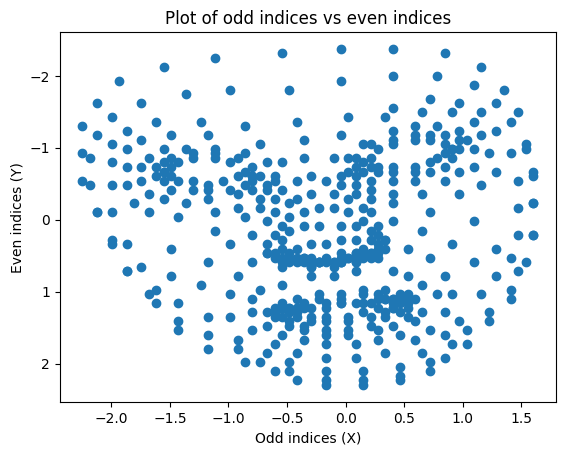

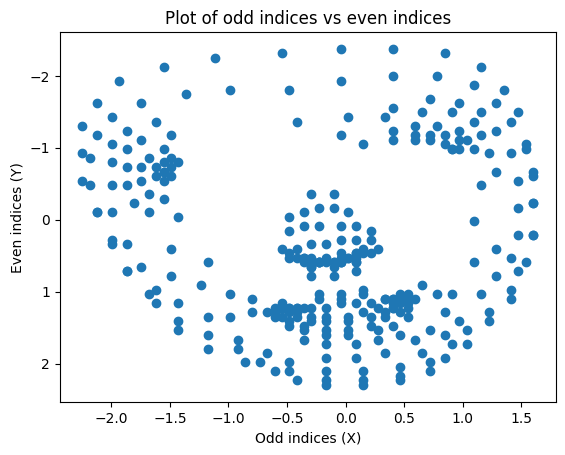

In [135]:
# Plot odd indices in x and even indices in y
face_selected = 0

plt.plot(normalized_data.T[face_selected, 0::2], normalized_data.T[face_selected,1::2], 'o')  # Odd indices (x) and even indices (y)
plt.gca().invert_yaxis()
# Add labels and title for better clarity
plt.xlabel("Odd indices (X)")
plt.ylabel("Even indices (Y)")
plt.title("Plot of odd indices vs even indices")
plt.show()



# Plot odd indices in x and even indices in y

plt.plot(data_selected.T[face_selected, 0::2], data_selected.T[face_selected, 1::2], 'o')  # Odd indices (x) and even indices (y)
plt.gca().invert_yaxis()
# Add labels and title for better clarity
plt.xlabel("Odd indices (X)")
plt.ylabel("Even indices (Y)")
plt.title("Plot of odd indices vs even indices")
plt.show()

In [136]:

import h5py
s = os.path.sep
do_it = input('Do you want to save the data? (y/n)')
if do_it == 'y':
    output_file = f'..{os.path.sep}..{os.path.sep}data{os.path.sep}features{os.path.sep}positions_Faces_PCA_v2.h5'

    # Create an HDF5 file and group data by labels
    with h5py.File(output_file, "w") as h5file:
        # Iterate over the labels and the data
        for i, label in enumerate(np.unique(labels_letter)):
            # Filter the positions corresponding to the current label
            group_data = reduced_data[labels_letter == label]
            
            # Transpose the group_data before saving
            data_selected = data[ top_features_list,n_data*i:n_data*(i+1)]  # Select the most relevant features
            
            # Create a group with the name of the label
            grp = h5file.create_group(str(label))
            print(label)
            # Create a dataset inside the group for the transposed positions
            grp.create_dataset('positions', data=data_selected)
        print(f"Data successfully saved to {output_file}")
        
        
    df = pd.DataFrame(top_features_list, columns=["Selected_Features"])

#Save the selected features
    df.to_csv(f'..{s}..{s}data{s}features{s}selected_index_faces_v2.csv', index=False)
else:
    print('Data not saved')



enojado
feliz
neutral
sorpresa
triste
Data successfully saved to ..\..\data\features\positions_Faces_PCA_v2.h5


In [137]:
top_features = pd.read_csv('..\\..\\data\\features\\selected_index_faces.csv' )
top_features['Selected_Features'].to_list() 

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 38,
 39,
 40,
 41,
 42,
 43,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 68,
 69,
 70,
 71,
 74,
 75,
 76,
 77,
 88,
 89,
 90,
 91,
 92,
 93,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 116,
 117,
 118,
 119,
 120,
 121,
 126,
 127,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 158,
 159,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 186,
 187,
 188,
 189,
 194,
 195,
 198,
 199,
 206,
 207,
 208,
 209,
 210,
 211,
 214,
 215,
 216,
 217,
 218,
 219,
 222,
 223,
 226,
 227,
 230,
 231,
 232,
 233,
 234,
 235,
 246,
 247,
 248,
 249,
 250,
 251,
 254,
 255,
 262,
 263,
 264,
 265,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 286,
 287,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
